# NEXT SILICON VALLEY PROJECT
This project consist of the visualization of trends of major US cities and their tech jobs list, transformed into a trend. Let's visualize it step-by-step

### Dependencies
First of all, let's install the dependencies

In [114]:
!pip install pandas matplotlib cartopy mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import mplcyberpunk

### Analyze dataset
... with pandas

In [116]:
jobs_df = pd.read_csv("../datasets/dice_com-job_us_sample.csv")
jobs_df.head()

,index,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


### Transform job cities into coordinates
since the given tech US job dataset have cities as text, we can transform them into coordinates through [Simple Map dataset](https://simplemaps.com/data/us-cities)

In [117]:
cities_df = pd.read_csv("../datasets/uscities.csv")
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18832416,10943.7,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11885717,3165.8,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8489066,4590.3,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6113982,4791.1,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,6046392,1386.5,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [118]:
jobs_df = jobs_df.drop(columns=['index'])

In [119]:
# Extract city and state from joblocation_address column
jobs_df[['city', 'state_id']] = jobs_df['joblocation_address'].str.extract(r'^(.*),\s*([A-Z]{2})$')

# Merge jobs_df with cities_df on city and state_id to get the corresponding latitude and longitude
merged_df = pd.merge(jobs_df, cities_df[['city', 'state_id', 'lat', 'lng']], on=['city', 'state_id'], how='left')

# Add the latitude and longitude columns to jobs_df
jobs_df['lat'] = merged_df['lat']
jobs_df['lng'] = merged_df['lng']

# Display the updated jobs_df
jobs_df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,city,state_id,lat,lng
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,Atlanta,GA,33.7628,-84.4220
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,Chicago,IL,41.8375,-87.6866
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,Schaumburg,IL,42.0308,-88.0838
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,Bolingbrook,IL,41.6901,-88.1021
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,Atlanta,GA,33.7628,-84.4220


### Normalizing city coordinates
let's transform the coordinates to normalization (we will need that later)

In [120]:
max_lat = jobs_df['lat'].max()
min_lat = jobs_df['lat'].min()
max_lng = jobs_df['lng'].max()
min_lng = jobs_df['lng'].min()

print(f"Max Latitude: {max_lat}, Min Latitude: {min_lat}")
print(f"Max Longitude: {max_lng}, Min Longitude: {min_lng}")

Max Latitude: 61.1508, Min Latitude: 21.3294
Max Longitude: -69.7319, Min Longitude: -162.0331


In [121]:
def normalize_coords(lat, lon, min_lat=21.3294, max_lat=61.1508, min_lon=-162.0331, max_lon=-69.7319):
    """Convert lat/lon to normalized (x, y) values in [0, 1] range."""
    norm_x = (lon - min_lon) / (max_lon - min_lon)
    norm_y = (max_lat - lat) / (max_lat - min_lat)  # Flip Y to match image
    return norm_x, norm_y

In [122]:
jobs_df[['norm_x', 'norm_y']] = jobs_df.apply(lambda row: normalize_coords(row['lat'], row['lng']), axis=1, result_type='expand')
jobs_df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id,city,state_id,lat,lng,norm_x,norm_y
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,Atlanta,GA,33.7628,-84.4220,0.840846,0.687771
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,Chicago,IL,41.8375,-87.6866,0.805477,0.484998
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,Schaumburg,IL,42.0308,-88.0838,0.801174,0.480144
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,Bolingbrook,IL,41.6901,-88.1021,0.800976,0.488700
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,Atlanta,GA,33.7628,-84.4220,0.840846,0.687771


### Analyzing trends
let's see the trends unique values, let's map them and plotting the result

In [123]:
jobs_df['postdate'].unique()

array(['1 hour ago', '1 week ago', '2 weeks ago', '48 minutes ago',
       '7 hours ago', '6 hours ago', '5 hours ago', '1 day ago',
       '8 hours ago', '22 hours ago', '24 hours ago', '23 hours ago',
       '21 hours ago', '20 minutes ago', '20 hours ago', '18 hours ago',
       '19 hours ago', '17 hours ago', '2 hours ago', '23 minutes ago',
       '24 minutes ago', '27 minutes ago', '30 minutes ago',
       '31 minutes ago', '13 minutes ago', '3 weeks ago', '2 days ago',
       '7 days ago', '6 days ago', '3 days ago', '3 hours ago',
       '4 hours ago', '4 days ago', '5 days ago', '10 minutes ago',
       '26 minutes ago', '9 minutes ago', '45 minutes ago', '4 weeks ago',
       '16 hours ago', '47 minutes ago', '1 month ago', '46 minutes ago',
       '13 hours ago', '49 minutes ago', '14 hours ago', '11 hours ago',
       '5 minutes ago', '50 minutes ago', '51 minutes ago',
       '52 minutes ago', '53 minutes ago', '10 hours ago', '15 hours ago',
       '54 minutes ago', '9 ho

### PCA
let's use PCA to reduce the dataset but still get relevant information

In [124]:
def map_postdate(postdate):
    if 'minutes' in postdate or 'hour' in postdate:
        return 'hot_recent'
    elif 'day' in postdate:
        return 'day_recent'
    elif 'week' in postdate:
        return 'weeks_recent'
    else:
        return 'recent'

jobs_df['postdate'] = jobs_df['postdate'].apply(map_postdate)
jobs_df[['postdate']].head()

,postdate
0,hot_recent
1,weeks_recent
2,weeks_recent
3,weeks_recent
4,hot_recent


In [125]:
jobs_df[['postdate']]['postdate'].unique()

array(['hot_recent', 'weeks_recent', 'day_recent', 'recent'], dtype=object)

In [126]:
def map_timespan(postdate):
    to_map = ['hot_recent', 'day_recent','weeks_recent', 'recent']
    return to_map.index(postdate)
jobs_df['postdate_int'] = jobs_df['postdate'].apply(map_timespan)
jobs_df[['postdate_int']].head()

,postdate_int
0,0
1,2
2,2
3,2
4,0


In [127]:
def transform_job(job):
    if "data" in job.lower() or "ai" in job.lower() or "ml" in job.lower():
       return "ai"
    elif "security" in job.lower() or "hack" in job.lower():
        return "security"
    elif "web" in job.lower() or "seo" in job.lower() or "frontend" in job.lower() or "backend" in job.lower() or "html" in job.lower() or "css" in job.lower():
        return "web"
    elif "devOps" in job.lower() or "lead" in job.lower() or "manag" in job.lower() or "cto" in job.lower() or "ceo" in job.lower() or "business" in job.lower():
        return "managment"
    else:
        return "other"
jobs_df['job_category'] = jobs_df['jobtitle'].apply(transform_job)
jobs_df.groupby('job_category').size()

job_category
ai            1848
managment     4244
other        14425
security       781
web            702
dtype: int64

### Building the new dataset
building the final plotting dataset...

In [128]:
jobs_df['n_tech_jobs'] = jobs_df.groupby('joblocation_address')['joblocation_address'].transform('count')
jobs_df['prevalent_job_type'] = jobs_df.groupby('joblocation_address')['job_category'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Group by city and sum the number of tech jobs
growing_tech_cities_df = jobs_df.groupby('joblocation_address').agg({'n_tech_jobs': 'max', 'lat': 'first', 'lng': 'first', 'postdate_int':'max', 'prevalent_job_type':'first'})
growing_tech_cities_df = growing_tech_cities_df.reset_index()
growing_tech_cities_df.columns = ['city', 'n_tech_jobs', 'lat', 'lng', 'postdate_timespan', 'prevalent_job_type']
max_tech_jobs = growing_tech_cities_df[['n_tech_jobs']].max()
city_max = growing_tech_cities_df.loc[growing_tech_cities_df['n_tech_jobs'] == max_tech_jobs['n_tech_jobs']]
city_max

,city,n_tech_jobs,lat,lng,postdate_timespan,prevalent_job_type
973,"New York, NY",1368.0,40.6943,-73.9249,3,other


In [129]:
merged_jobs_city_df = pd.merge(growing_tech_cities_df, jobs_df[["city","norm_x","norm_y","postdate_int"]], on=["city"])
growing_tech_cities_df['postdate_timespan'] = merged_jobs_city_df.groupby('city')['postdate_int'].transform('max')
growing_tech_cities_df.head()

,city,n_tech_jobs,lat,lng,postdate_timespan,prevalent_job_type
0,"Abbott Park, IL",1.0,38.9497,-77.3461,2,managment
1,"Aberdeen Proving Ground, MD",2.0,35.7819,-78.8195,2,other
2,"Aberdeen, MD",5.0,37.1051,-76.5185,2,other
3,"Acton, MA",3.0,NaN,NaN,2,ai
4,"Acworth, GA",1.0,37.5295,-77.4756,2,other


### Optional style
we can use the cyberpunk theme (found on [Medium](https://medium.com/@HeCanThink/cyberpunked-python-creating-cyberpunk-style-visualizations-in-python-1b574690e68))

In [130]:
# Set cyberpunk theme as default
plt.style.use('cyberpunk')

### Plotting
we can finally visualize our data:

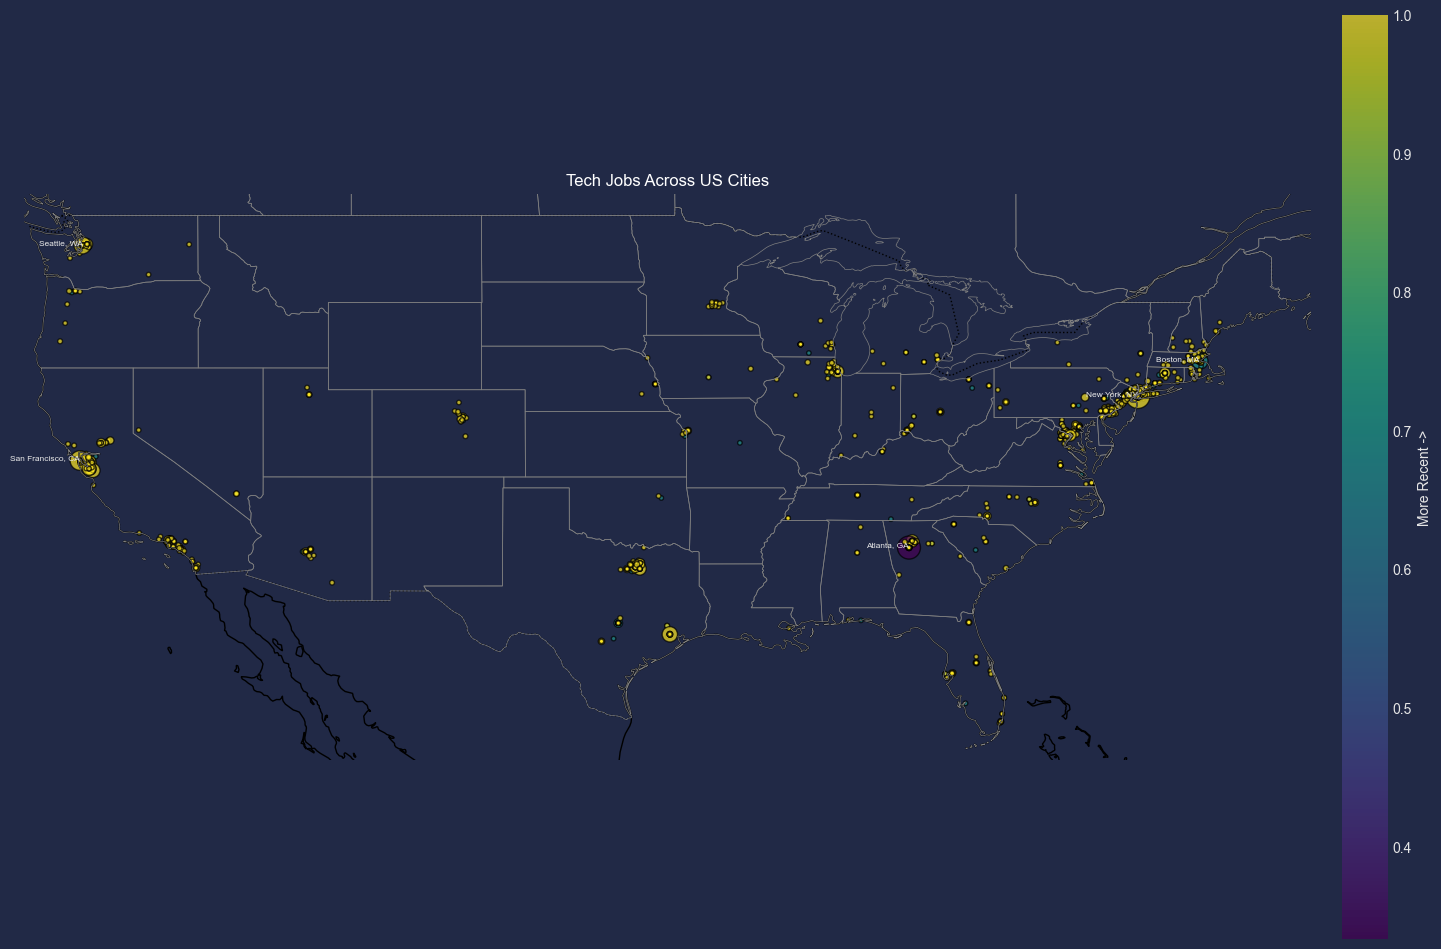

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())  # USA Boundaries

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.STATES, edgecolor="gray", linewidth=0.5)

# Normalize sizes and colors
size_min, size_max = 10, 300
color_map = plt.cm.viridis
growing_tech_cities_df["size"] = growing_tech_cities_df["n_tech_jobs"] / growing_tech_cities_df["n_tech_jobs"].max() * (size_max - size_min) + size_min # Normalize size [0,1]
growing_tech_cities_df["color"] = growing_tech_cities_df["postdate_timespan"] / growing_tech_cities_df["postdate_timespan"].max()  # Normalize colors [0,1]

# Scatter plot
sc = ax.scatter(growing_tech_cities_df["lng"], growing_tech_cities_df["lat"], s=growing_tech_cities_df["size"], c=growing_tech_cities_df["color"], cmap=color_map, alpha=0.7, edgecolors="black")

# Colorbar for `postdate_timespan`
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("More Recent ->")

# Add city labels (not too much because of space)
for _, row in growing_tech_cities_df.nlargest(5, 'n_tech_jobs').iterrows():
    ax.text(row["lng"], row["lat"], row["city"], fontsize=6, transform=ccrs.PlateCarree(), ha="right")

plt.title("Tech Jobs Across US Cities")
plt.show()


### Export
after all this data manipulation, we can export the dataset for frontend

In [134]:
growing_tech_cities_df.to_csv('../datasets/growing_tech_cities.csv')